In [2]:
import os
import json
import pandas as pd
from tqdm import tqdm
from script import GET_RECOMMENDATION
import time
import gc

start = time.time()

# Initialize book title:
books_title = pd.read_json('./data/books_title.json')
books_title['book_id'] = books_title['book_id'].astype(str)

# file path for 10 test users
path = './data/users/'

# store test-train-top recommendation for each user. key = user_xxx
dictionary = {} 

for file in tqdm(os.listdir(path), total = 10, desc = 'Processing', mininterval = 0.2):

    file_path = os.path.join(path, file)
    user_info = pd.read_csv(file_path)

    # construct model class
    recommend = GET_RECOMMENDATION(user = user_info, book_title = books_title, percentage = 35, split_size = 0.3, current_user = file[:-4])

    csv_book_map = recommend.book_mapping()
    filtered_users = recommend.similar_users(book_map = csv_book_map)
    interaction_list = recommend.interactions(filtered_users, csv_book_map)
    
    # Free RAM
    del csv_book_map
    del filtered_users
    gc.collect()

    top_recommendations = recommend.collab_filter(interaction_list)
    top_recommendations = top_recommendations['book_id'].to_numpy().astype(int)
    
    # create dictionary entry per user for evaluation purpose
    train_data = recommend.get_train_set()
    train_data = train_data['book_id'].to_numpy().astype(int)

    test_data = recommend.get_test_set()
    test_data = test_data['book_id'].to_numpy().astype(int)

    print ('Creating dictionary for ' + file[:-4])
    dictionary[file[:-4]] = [train_data.tolist(), test_data.tolist(), top_recommendations.tolist()]
    
    # clear variables to free up memory
    del recommend
    del interaction_list
    del top_recommendations
    del train_data
    del test_data
    gc.collect()
    
    time.sleep(3)

# save dictionary as JSON file
with open('./data/dict/top_recs.json', 'w') as f:
    json.dump(dictionary, f)

print ('Finished Process in {:.3f} min'.format((time.time() - start)/60.0))

Processing:   0%|          | 0/10 [00:00<?, ?it/s]

Finding similar users...
Total users who've read the same books as user_0: 452891
Total users who've read at least 35.0% of the books that user_0 has read: 1080
Total books in filtered user list: 4160354

Applying Collaborative Filtering
Number of unique users: 1080
Number of unique books: 704741
Creating dictionary for user_0


Processing:  10%|█         | 1/10 [07:41<1:09:14, 461.65s/it]

Finding similar users...
Total users who've read the same books as user_1440: 414461
Total users who've read at least 35.0% of the books that user_1440 has read: 495
Total books in filtered user list: 3889274

Applying Collaborative Filtering
Number of unique users: 495
Number of unique books: 705829
Creating dictionary for user_1440


Processing:  20%|██        | 2/10 [15:31<1:01:52, 464.12s/it]

Finding similar users...
Total users who've read the same books as user_1830: 402151
Total users who've read at least 35.0% of the books that user_1830 has read: 20502
Total books in filtered user list: 25828356

Applying Collaborative Filtering
Number of unique users: 20502
Number of unique books: 1110017
Creating dictionary for user_1830


Processing:  30%|███       | 3/10 [30:11<1:08:41, 588.83s/it]

Finding similar users...
Total users who've read the same books as user_2063: 407310
Total users who've read at least 35.0% of the books that user_2063 has read: 4225
Total books in filtered user list: 9801311

Applying Collaborative Filtering
Number of unique users: 4225
Number of unique books: 921808
Creating dictionary for user_2063


Processing:  40%|████      | 4/10 [39:32<58:03, 580.64s/it]  

Finding similar users...
Total users who've read the same books as user_2518: 435162
Total users who've read at least 35.0% of the books that user_2518 has read: 93
Total books in filtered user list: 1238501

Applying Collaborative Filtering
Number of unique users: 93
Number of unique books: 434985
Creating dictionary for user_2518


Processing:  50%|█████     | 5/10 [46:18<44:00, 528.14s/it]

Finding similar users...
Total users who've read the same books as user_2816: 305997
Total users who've read at least 35.0% of the books that user_2816 has read: 57
Total books in filtered user list: 1368991

Applying Collaborative Filtering
Number of unique users: 57
Number of unique books: 482095
Creating dictionary for user_2816


Processing:  60%|██████    | 6/10 [52:58<32:38, 489.60s/it]

Finding similar users...
Total users who've read the same books as user_3075: 556299
Total users who've read at least 35.0% of the books that user_3075 has read: 37057
Total books in filtered user list: 39548892

Applying Collaborative Filtering
Number of unique users: 37057
Number of unique books: 1331344
Creating dictionary for user_3075


Processing:  70%|███████   | 7/10 [1:28:33<49:10, 983.34s/it]

Finding similar users...
Total users who've read the same books as user_3732: 144288
Total users who've read at least 35.0% of the books that user_3732 has read: 1043
Total books in filtered user list: 4419263

Applying Collaborative Filtering
Number of unique users: 1043
Number of unique books: 725213
Creating dictionary for user_3732


Processing:  80%|████████  | 8/10 [1:35:45<27:16, 818.01s/it]

Finding similar users...
Total users who've read the same books as user_4297: 254817
Total users who've read at least 35.0% of the books that user_4297 has read: 745
Total books in filtered user list: 4942811

Applying Collaborative Filtering
Number of unique users: 745
Number of unique books: 708868
Creating dictionary for user_4297


Processing:  90%|█████████ | 9/10 [1:47:56<13:11, 791.87s/it]

Finding similar users...
Total users who've read the same books as user_4574: 229112
Total users who've read at least 35.0% of the books that user_4574 has read: 604
Total books in filtered user list: 3374688

Applying Collaborative Filtering
Number of unique users: 604
Number of unique books: 683090
Creating dictionary for user_4574


Processing: 100%|██████████| 10/10 [1:58:35<00:00, 711.52s/it]


FileNotFoundError: [Errno 2] No such file or directory: './data/dict/top_recs.json'

In [ ]:
# To load this
# with open('./data/dict/top_recs.json') as file:
#       data = json.load(file)

'''
    dictionary contains each of the 10 users with training data @ index 0, testing data @ index 1 and top N recommendations @ index 2
    We can now see how many matches we get between index 1 and index 0.

    To improve accuracy, we can try to increase percentage (arg for GET_RECOMMENDATION). See script.py for other possible hyperparameter.
'''

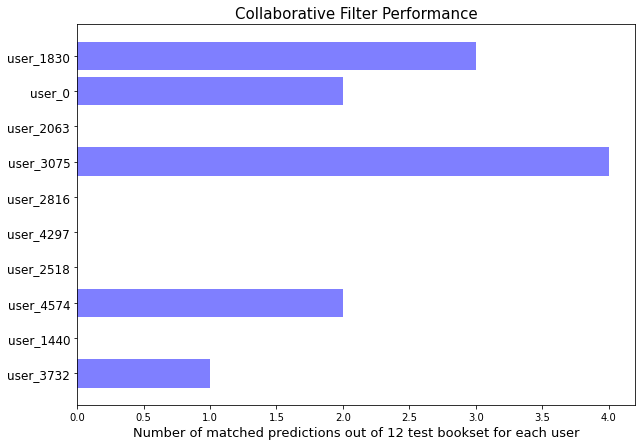

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

with open('./data/dict/top_recs35%.json') as file:
    data = json.load(file)

matched_books = {}

for user in (data.keys()):
    test = np.array(data[user][1])
    recs = np.array(data[user][2])
    count = 0

    for i in range(len(recs)):
        for j in range(len(test)):
            if recs[i] == test[j]:
                count += 1
    
    matched_books[user] = count

names = []
performance = []
for user in (matched_books):
    names.append(user)
    performance.append(matched_books[user])


y_pos = np.arange(len(names))

plt.figure(figsize=(10,7))
plt.tight_layout()
plt.barh(y_pos, performance, align = 'center', alpha = 0.5, color = 'blue')
plt.yticks(y_pos, names, fontsize = 12)
plt.xlabel('Number of matched predictions out of 12 test bookset for each user', fontsize = 13)
plt.title('Collaborative Filter Performance', fontsize = 15)
plt.savefig('35% result.jpg')
plt.show()

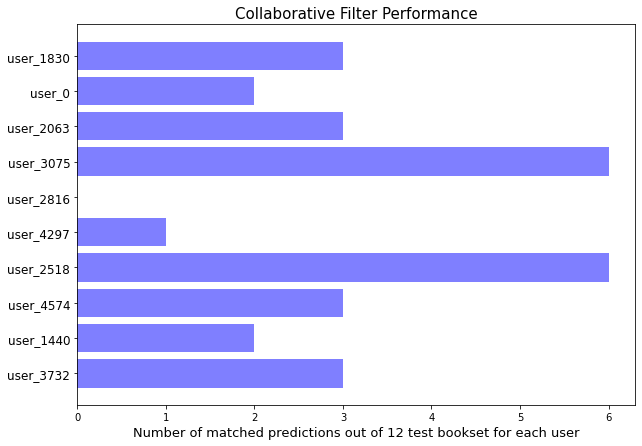

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

with open('./data/dict/top_recs20%.json') as file:
    data = json.load(file)

matched_books = {}

for user in (data.keys()):
    test = np.array(data[user][1])
    recs = np.array(data[user][2])
    count = 0

    for i in range(len(recs)):
        for j in range(len(test)):
            if recs[i] == test[j]:
                count += 1
    
    matched_books[user] = count

names = []
performance = []
for user in (matched_books):
    names.append(user)
    performance.append(matched_books[user])


y_pos = np.arange(len(names))

plt.figure(figsize=(10,7))
plt.tight_layout()
plt.barh(y_pos, performance, align = 'center', alpha = 0.5, color = 'blue')
plt.yticks(y_pos, names, fontsize = 12)
plt.xlabel('Number of matched predictions out of 12 test bookset for each user', fontsize = 13)
plt.title('Collaborative Filter Performance', fontsize = 15)
plt.savefig('20% result.jpg')
plt.show()